In [1]:
from datapipeline import DataFeed
import os
import pandas as pd
from datetime import datetime

In [2]:
self = DataFeed()

In [3]:
brazil = self.get_BrazilCFR
brazil.dropna(inplace=True)

In [4]:
seasia = self.get_SEAsiaCFR
seasia.dropna(inplace=True)

In [5]:
foodpriceindex = self.get_food_price_index
foodpriceindex.dropna(inplace=True)

In [6]:
eurusd = self.get_eurusd
eurusd.dropna(inplace=True)

In [7]:
cpi = self.get_g20_cpi
cpi.dropna(inplace=True)

In [8]:
gdp = self.get_gdp
gdp.dropna(inplace=True)

In [9]:
netback = self.get_historical_netback
netback.dropna(inplace=True)

In [10]:
minenetback = self.get_historical_mineNetback
minenetback.dropna(inplace=True)

In [11]:
naturalgas = self.get_natural_gas
naturalgas.dropna(inplace=True)

In [12]:
ethanol = self.get_ethanol
ethanol.dropna(inplace=True)

In [13]:
fertilizerprod = self.get_total_fertilizer_production
fertilizerprod.dropna(inplace=True)

In [14]:
freightcost = self.get_freightCost
freightcost.dropna(inplace=True)

In [15]:
interim = self.get_interimPricing
interim.dropna(inplace=True)

In [16]:
_vars = [brazil,seasia,foodpriceindex,eurusd,cpi,gdp,netback,minenetback,naturalgas,ethanol,fertilizerprod,freightcost,interim]

In [78]:
counts = [v.iloc[0].name for v in _vars]

Timestamp('2021-12-01 00:00:00')

In [81]:
# GET THE SMALLEST DATA SET
times = _vars[counts.index(max(counts))].index.tolist()

In [82]:
times

[Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-04-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-06-01 00:00:00'),
 Timestamp('2023-07-01 00:00:00'),
 Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-10-01 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00')]

In [19]:
from models import ActualNetback, BrazilCFR

In [83]:
curr_month = 7
curr_year = 2022

In [84]:
m = ActualNetback()

In [85]:
predictions = []
for t in times:
    month = t.month
    year = t.year
    if year==curr_year:
        if month<=curr_month:
            predictions.append([year,month,m.predict(month,year)])
    else:
        predictions.append([year,month,m.predict(month,year)])

Predicting Actual Netback >> 12 / 2021...
Predicting MineNetback >> 12 / 2021...
Predicting SE Asia >> 12 / 2021...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 10825.79it/s]


**************************************************
        Predictions
count  20000.000000
mean     471.856820
std       56.100462
min      330.981579
25%      431.653920
50%      471.569166
75%      512.104141
max      611.341740
**************************************************
Max Density -->>> $472.56
Predicting Brazil >> 12 / 2021...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 6762.39it/s]


**************************************************
        Predictions
count  20000.000000
mean     872.473186
std       82.090563
min      664.596553
25%      813.893145
50%      871.510924
75%      931.890018
max     1082.452485
**************************************************
Max Density -->>> $866.41


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 22298.75it/s]


**************************************************
        Predictions
count  20000.000000
mean     502.530893
std       43.849112
min      366.476809
25%      471.997419
50%      502.482266
75%      532.828904
max      646.158986
**************************************************
Max Density -->>> $503.8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 13603.30it/s]


**************************************************
        Predictions
count  20000.000000
mean     408.048837
std       39.912216
min      283.475022
25%      380.213182
50%      408.314479
75%      435.410171
max      540.137148
**************************************************
Max Density -->>> $410.01
Predicting Actual Netback >> 1 / 2022...
Predicting MineNetback >> 1 / 2022...
Predicting SE Asia >> 1 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 6492.62it/s]


**************************************************
        Predictions
count  20000.000000
mean     479.901308
std       57.867710
min      336.741392
25%      438.509756
50%      480.294730
75%      521.501307
max      625.544258
**************************************************
Max Density -->>> $482.01
Predicting Brazil >> 1 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 6014.93it/s]


**************************************************
        Predictions
count  20000.000000
mean     869.750692
std       79.554867
min      666.443748
25%      812.746885
50%      869.994053
75%      926.498910
max     1075.879284
**************************************************
Max Density -->>> $871.57


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 17408.35it/s]


**************************************************
        Predictions
count  20000.000000
mean     502.833731
std       43.332217
min      362.161345
25%      472.670707
50%      502.962271
75%      533.018360
max      636.758987
**************************************************
Max Density -->>> $507.43


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 14516.08it/s]


**************************************************
        Predictions
count  20000.000000
mean     522.636252
std       45.962662
min      372.186372
25%      490.435609
50%      522.739101
75%      554.905036
max      674.455330
**************************************************
Max Density -->>> $529.07
Predicting Actual Netback >> 2 / 2022...
Predicting MineNetback >> 2 / 2022...
Predicting SE Asia >> 2 / 2022...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 11500.35it/s]


**************************************************
        Predictions
count  20000.000000
mean     493.577487
std       56.442317
min      352.305680
25%      453.449537
50%      493.744039
75%      533.516860
max      637.623647
**************************************************
Max Density -->>> $495.25
Predicting Brazil >> 2 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:04<00:00, 4586.80it/s]


**************************************************
        Predictions
count  20000.000000
mean     856.117853
std       73.613644
min      667.015693
25%      804.168134
50%      855.768382
75%      908.827802
max     1046.107735
**************************************************
Max Density -->>> $853.91


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 12555.59it/s]


**************************************************
        Predictions
count  20000.000000
mean     495.399949
std       41.333265
min      358.369571
25%      466.896368
50%      495.275914
75%      524.459707
max      638.870195
**************************************************
Max Density -->>> $486.55


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 8054.78it/s]


**************************************************
        Predictions
count  20000.000000
mean     541.891946
std       50.749705
min      380.112088
25%      506.664847
50%      541.953262
75%      577.317121
max      700.538898
**************************************************
Max Density -->>> $547.7
Predicting Actual Netback >> 3 / 2022...
Predicting MineNetback >> 3 / 2022...
Predicting SE Asia >> 3 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 5627.67it/s]


**************************************************
        Predictions
count  20000.000000
mean     635.239020
std       59.659121
min      482.155409
25%      593.004562
50%      635.809915
75%      677.253270
max      780.792275
**************************************************
Max Density -->>> $637.75
Predicting Brazil >> 3 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:04<00:00, 4549.53it/s]


**************************************************
        Predictions
count  20000.000000
mean    1094.716852
std       75.949929
min      891.186829
25%     1040.371497
50%     1095.431553
75%     1148.947814
max     1286.170858
**************************************************
Max Density -->>> $1096.19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 20618.49it/s]


**************************************************
        Predictions
count  20000.000000
mean     640.110881
std       43.615678
min      496.925642
25%      609.598803
50%      639.836651
75%      670.606450
max      782.074934
**************************************************
Max Density -->>> $639.21


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 14056.95it/s]


**************************************************
        Predictions
count  20000.000000
mean     611.704757
std       54.888471
min      425.677787
25%      572.928241
50%      611.328647
75%      650.040132
max      785.364566
**************************************************
Max Density -->>> $608.76
Predicting Actual Netback >> 4 / 2022...
Predicting MineNetback >> 4 / 2022...
Predicting SE Asia >> 4 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 8435.57it/s]


**************************************************
        Predictions
count  20000.000000
mean     829.920351
std       70.944085
min      652.122770
25%      779.352611
50%      830.173071
75%      881.133221
max     1008.877792
**************************************************
Max Density -->>> $832.29
Predicting Brazil >> 4 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 5701.84it/s]


**************************************************
        Predictions
count  20000.000000
mean    1272.952287
std       81.991159
min     1058.815629
25%     1214.291735
50%     1272.278363
75%     1331.592212
max     1487.536417
**************************************************
Max Density -->>> $1272.75


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 22109.90it/s]


**************************************************
        Predictions
count  20000.000000
mean     823.310561
std       49.023796
min      661.067005
25%      788.798875
50%      823.510327
75%      857.353418
max      980.686113
**************************************************
Max Density -->>> $824.4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 12974.97it/s]


**************************************************
        Predictions
count  20000.000000
mean     661.661709
std       59.126076
min      480.517322
25%      619.739137
50%      661.151279
75%      703.292590
max      853.947503
**************************************************
Max Density -->>> $657.14
Predicting Actual Netback >> 5 / 2022...
Predicting MineNetback >> 5 / 2022...
Predicting SE Asia >> 5 / 2022...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 10618.97it/s]


**************************************************
        Predictions
count  20000.000000
mean     854.977429
std       75.694681
min      667.224994
25%      800.574704
50%      853.981405
75%      909.729152
max     1045.069226
**************************************************
Max Density -->>> $850.47
Predicting Brazil >> 5 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 6299.51it/s]


**************************************************
        Predictions
count  20000.000000
mean    1273.507759
std       78.930414
min     1060.974120
25%     1217.033889
50%     1273.636710
75%     1329.681551
max     1481.388970
**************************************************
Max Density -->>> $1273.29


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 22493.29it/s]


**************************************************
        Predictions
count  20000.000000
mean     826.951228
std       49.484855
min      667.636030
25%      792.143659
50%      826.821253
75%      861.071247
max      985.356892
**************************************************
Max Density -->>> $824.27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 11930.35it/s]


**************************************************
        Predictions
count  20000.000000
mean     692.197901
std       60.715032
min      485.973696
25%      648.561413
50%      692.453306
75%      734.718616
max      892.175281
**************************************************
Max Density -->>> $698.43
Predicting Actual Netback >> 6 / 2022...
Predicting MineNetback >> 6 / 2022...
Predicting SE Asia >> 6 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 9718.23it/s]


**************************************************
        Predictions
count  20000.000000
mean     852.141417
std       74.999622
min      662.441664
25%      798.269535
50%      852.559383
75%      905.851020
max     1042.243972
**************************************************
Max Density -->>> $851.96
Predicting Brazil >> 6 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 5360.73it/s]


**************************************************
        Predictions
count  20000.000000
mean    1169.969099
std       72.967399
min      962.369373
25%     1117.808843
50%     1170.113660
75%     1222.630685
max     1374.197921
**************************************************
Max Density -->>> $1170.34


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 12872.71it/s]


**************************************************
        Predictions
count  20000.000000
mean     788.416468
std       47.315723
min      640.261965
25%      755.597318
50%      789.001533
75%      821.385431
max      940.309185
**************************************************
Max Density -->>> $797.19


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 8033.41it/s]


**************************************************
        Predictions
count  20000.000000
mean     734.039124
std       62.402089
min      522.466864
25%      690.019642
50%      734.223603
75%      778.163455
max      920.471727
**************************************************
Max Density -->>> $725.85
Predicting Actual Netback >> 7 / 2022...
Predicting MineNetback >> 7 / 2022...
Predicting SE Asia >> 7 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 6569.46it/s]


**************************************************
        Predictions
count  20000.000000
mean     833.928895
std       71.251947
min      646.954210
25%      782.728990
50%      833.665963
75%      885.098493
max     1015.449382
**************************************************
Max Density -->>> $833.78
Predicting Brazil >> 7 / 2022...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:04<00:00, 4277.26it/s]


**************************************************
        Predictions
count  20000.000000
mean    1093.948384
std       67.329797
min      896.209140
25%     1046.391459
50%     1093.795113
75%     1140.947388
max     1300.750596
**************************************************
Max Density -->>> $1092.41


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 13706.94it/s]


**************************************************
        Predictions
count  20000.000000
mean     770.899799
std       44.527329
min      624.964365
25%      739.456189
50%      770.639923
75%      801.490298
max      907.663414
**************************************************
Max Density -->>> $769.43


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 7316.97it/s]


**************************************************
        Predictions
count  20000.000000
mean     696.677561
std       60.500573
min      505.743538
25%      654.209853
50%      697.325598
75%      739.353759
max      894.290376
**************************************************
Max Density -->>> $699.63
Predicting Actual Netback >> 1 / 2023...
Predicting MineNetback >> 1 / 2023...
Predicting SE Asia >> 1 / 2023...


IndexError: single positional indexer is out-of-bounds

In [86]:
netback_comparison = pd.DataFrame(predictions,columns=['Year','Month','Prediction'])
netback_comparison['Interim']= interim[-len(netback_comparison):].InterimPricing.values

# No need to shift since actual is realized by month end
# netback_comparison['Prediction'] = netback_comparison.Prediction.shift(1)

netback_comparison['Actual'] = netback[-len(netback_comparison):]['Netback ($/tonne)'].values

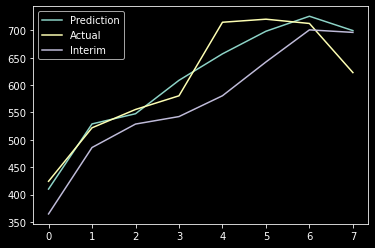

In [87]:
netback_comparison[['Prediction','Actual','Interim']].plot()

In [88]:
netback_comparison['Err-Prediction-Actual'] = (netback_comparison['Actual']/netback_comparison['Prediction']-1)*100
netback_comparison['Err-Interim-Actual'] = (netback_comparison['Actual']/netback_comparison['Interim']-1)*100

In [89]:
netback_comparison

,Year,Month,Prediction,Interim,Actual,Err-Prediction-Actual,Err-Interim-Actual
0,2021,12,410.01,364.613524,424.224873,3.466958,16.349188
1,2022,1,529.07,485.979484,522.000000,-1.336307,7.411942
2,2022,2,547.70,528.819883,555.469715,1.418608,5.039491
3,2022,3,608.76,542.513635,580.475858,-4.646189,6.997469
4,2022,4,657.14,580.571322,714.881002,8.786712,23.134054
5,2022,5,698.43,642.309268,720.468911,3.155493,12.168537
6,2022,6,725.85,700.956338,712.663293,-1.816726,1.670140
7,2022,7,699.63,696.350225,622.874274,-10.970903,-10.551580


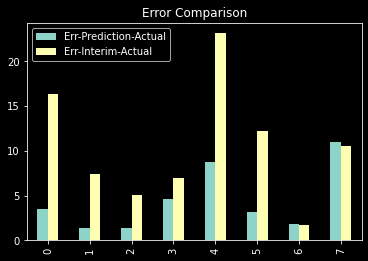

In [92]:
abs(netback_comparison[['Err-Prediction-Actual','Err-Interim-Actual']]).plot(kind='bar',title='Error Comparison')